# EDA

## Đọc và nhận xét dữ liệu

In [2]:
import pandas as pd
link = "https://drive.google.com/file/d/1X30TaeweaZS_hseieLX4M5FytQJhgTXs/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)
d_map = df[['Entity','Latitude','Longitude']]
display(df.head())

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

In [3]:
display(df.describe())
display(df.describe(exclude=[int,float]))

Year  Access to electricity (% of population)  \
count  3649.000000                              3639.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.275541   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.800890   
50%    2010.000000                                98.361570   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3480.000000   
mean                           63.255287   
std                            39.043658   
min                             0.000000   
25%                            23.175000   
50%                            83.150000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        2718.000000      
mean                                          113.137498      
std                                           244.167256      
min                                             0.000000      
25%                                             3.540000      
50%                                            32.910000      
75%                                           112.210000      
max                                          3060.190000      

       Financial flows to developing countries (US $)  \
count                                    1.560000e+03   
mean                                     9.422400e+07   
std                                      2.981544e+08   
min                                      0.000000e+00   
25%                                      2.600000e+05   
50%                                      5.665000e+06   
75%                                      5.534750e+07   
max                                      5.202310e+09   

       Renewable energy share in the total final energy consumption (%)  \
count                                        3455.000000                  
mean                                           32.638165                  
std                                            29.894901                  
min                                             0.000000                  
25%                                             6.515000                  
50%                                            23.300000                  
75%                                            55.245000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3628.000000                     3523.000000   
mean                             70.365003                       13.450190   
std                             348.051866                       73.006623   
min                               0.000000                        0.000000   
25%                               0.290000                        0.000000   
50%                               2.970000                        0.000000   
75%                              26.837500                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3628.000000   
mean                           23.968010   
std                           104.431085   
min                             0.000000   
25%                             0.040000   
50%                             1.470000   
75%                             9.600000   
max                          2184.940000   

       Low-carbon electricity (% electricity)  \
count                             3607.000000   
mean                                36.801182   
std                                 34.31488

Entity Density\n(P/Km2)
count          3649             3648
unique          176              124
top     Afghanistan               25
freq             21              147

- Nhìn mô tả về dữ liệu này cho thấy, dữ liệu có khá nhiều cột bị null
- Có một số cột có outliers là **Electirc city from fossil fuels, Electricity from renewables, GDP_Growth** ==> Xử lý
- Kiểm tra dữ liệu cột **Density** để đổi kiểu sang kiểu số
- Cần kiểm tra cột **Electricity from nuclear**

## Kiểm tra null và duplicated

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
df.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [6]:
df.duplicated().sum()

0

In [7]:
df.rename(columns={"Value_co2_emissions_kt_by_country":"CO2_emissions" , 'Land Area(Km2)':'Land'} , inplace=True)
df.rename(columns={'Density\\n(P/Km2)': 'New_Density'}, inplace=True)

# Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [9]:
energy_co2_data = df[['Entity', 'Year', 'CO2_emissions']]
energy_co2_data.head()

Entity  Year  CO2_emissions
0  Afghanistan  2000     760.000000
1  Afghanistan  2001     730.000000
2  Afghanistan  2002    1029.999971
3  Afghanistan  2003    1220.000029
4  Afghanistan  2004    1029.999971

- Tạo ra dataframe mới chứa **Entity, Year, CO2_emissions**

In [10]:
result = df.groupby(['Entity'])['CO2_emissions'].sum().reset_index()
result = result.sort_values(by='CO2_emissions', ascending=False)
result[['CO2_emissions']] = result[['CO2_emissions']].astype(object)
result.head()

Entity  CO2_emissions
34           China  152732849.267
169  United States  106590770.684
74           India  32679579.9932
81           Japan   23674689.705
62         Germany  15472890.0537

- Sử dụng groub by theo **Entity** để tìm ra các nước có khí thải CO2 lớn nhất

In [11]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

energy_co2_data_india = energy_co2_data[energy_co2_data['Entity'] == 'India']
energy_co2_data_united_states = energy_co2_data[energy_co2_data['Entity'] == 'United States']
energy_co2_data_china = energy_co2_data[energy_co2_data['Entity'] == 'China']

fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=('India', 'United States', 'China'),
    specs=[[{}, {}], [{"colspan": 2}, None]]
)

fig.add_trace(go.Bar(x=energy_co2_data_india['Year'], y=energy_co2_data_india['CO2_emissions']), row=1, col=1)
fig.add_trace(go.Bar(x=energy_co2_data_united_states['Year'], y=energy_co2_data_united_states['CO2_emissions']), row=1, col=2)
fig.add_trace(go.Bar(x=energy_co2_data_china['Year'], y=energy_co2_data_china['CO2_emissions']), row=2, col=1)

fig.update_layout(
    height=600,
    width=1000,
    showlegend=False,
    title={'text': 'Three countries with the largest CO2 emissions', 'x': 0.5}
)
fig.show()


- Biểu đồ cột thể hiện 3 nước có khí thải CO2 cao nhất là **China, USA, India**

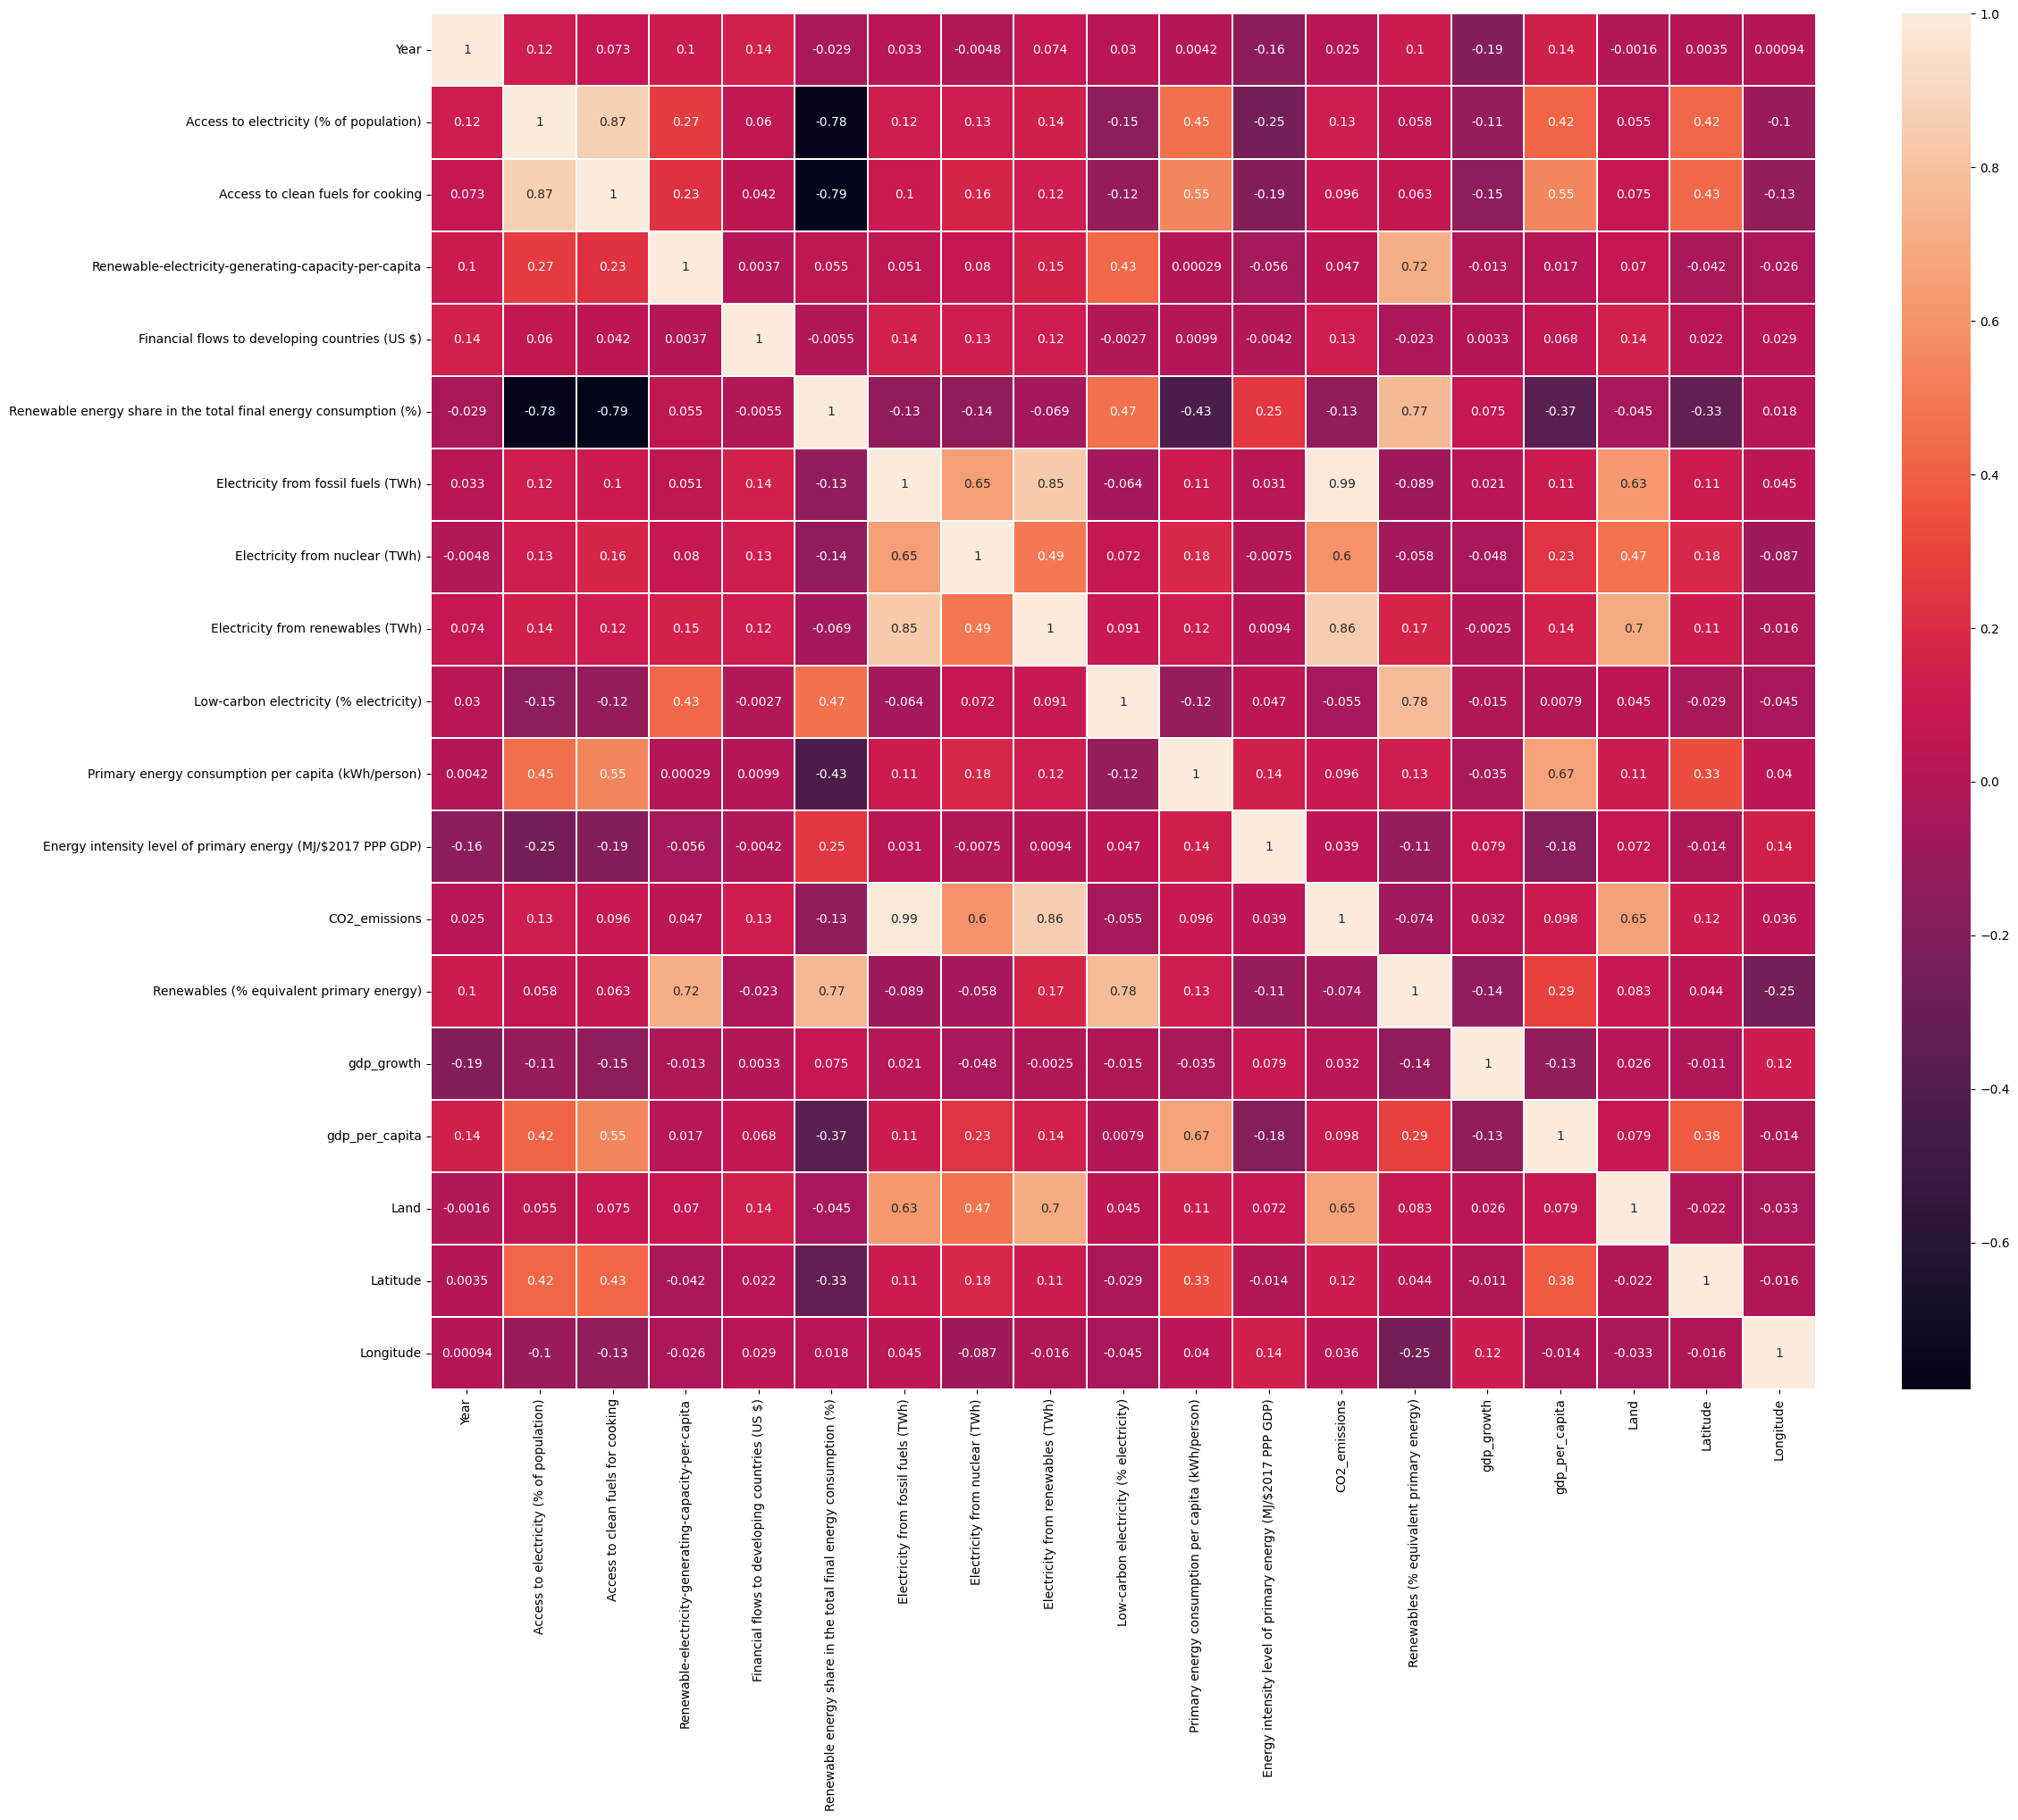

In [12]:
fig, ax = plt.subplots(figsize = (25, 20))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidths = 0.30)
plt.show()

- Các cột có độ tương quan cao với cột target **CO2_emissions** là **Electricity from fossil fuels (TWh), Electricity from renewables (TWh), Land, Electricity from nuclear (TWh), Renewable energy share in the total final energy consumption (%), Renewables (% equivalent primary energy), Low-carbon electricity (% electricity)**

In [13]:
df.corr(numeric_only=True).CO2_emissions.sort_values(ascending=True).head()

Renewable energy share in the total final energy consumption (%)   -0.132715
Renewables (% equivalent primary energy)                           -0.073735
Low-carbon electricity (% electricity)                             -0.054515
Year                                                                0.024759
gdp_growth                                                          0.031523
Name: CO2_emissions, dtype: float64

In [14]:
df.corr(numeric_only=True).CO2_emissions.sort_values(ascending=False).head()

CO2_emissions                          1.000000
Electricity from fossil fuels (TWh)    0.989741
Electricity from renewables (TWh)      0.856270
Land                                   0.653732
Electricity from nuclear (TWh)         0.598495
Name: CO2_emissions, dtype: float64

# Preprocessing

## Xử lý null

In [15]:
df.drop(columns='Entity',inplace=True)

In [16]:
cols = df.columns
for col in cols:
  if df[col].isnull().sum() > 0:
    if df[col].dtype == 'float64':
      df[col] = df[col].fillna(df[col].mean())
    if df[col].dtype == 'object':
      df[col] = df[col].fillna(df[col].mode())


In [17]:
df['New_Density'] = df['New_Density'].str.replace(',','').astype(float)
df['New_Density'] = df['New_Density'].fillna(df['New_Density'].mean())

In [18]:
df.isnull().sum()

Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
CO2_emissions                                                       0
Renewables (% equivalent primary energy)                            0
gdp_growth          

- Đã xử lý null xong

## OSL model

In [19]:
corr = df.corr()
columns_to_drop= []
for col in df.corr().columns:
  if 0 < corr.loc['CO2_emissions', col] <0.5:
    columns_to_drop.append(col)

In [20]:
columns_to_drop

['Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'gdp_growth',
 'gdp_per_capita',
 'Latitude',
 'Longitude']

In [21]:
df.drop(columns=columns_to_drop,inplace=True)

In [22]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
X = df
X = sm.add_constant(X)
y = df['CO2_emissions']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_emissions   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.921e+32
Date:                Sat, 11 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:58:08   Log-Likelihood:                 73050.
No. Observations:                3649   AIC:                        -1.461e+05
Df Residuals:                    3639   BIC:                        -1.460e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                            -3.859e-11   1.69e-11     -2.289      0.022   -7.16e-11   -5.53e-12
Renewable energy share in the total final energy consumption (%)  2.289e-12   3.23e-13      7.092      0.000    1.66e-12    2.92e-12
Electricity from fossil fuels (TWh)                               5.914e-15   1.02e-13      0.058      0.954   -1.94e-13    2.06e-13
Electricity from nuclear (TWh)                                   -1.697e-12   1.61e-13    -10.562      0.000   -2.01e-12   -1.38e-12
Electricity from renewables (TWh)                                 7.051e-13   1.89e-13      3.738      0.000    3.35e-13    1.07e-12
Low-carbon electricity (% electricity)                             6.51e-13      3e-13      2.167      0.030     6.2e-14    1.24e-12
CO2_emissions                                                        1.0000   3.74e-17   2.67e+16      0.000       1.000       1.000
Renewables (% equivalent primary energy)                         -1.166e-11   1.02e-12    -11.385      0.000   -1.37e-11   -9.65e-12
New_Density                                                      -3.094e-13   1.22e-14    -25.399      0.000   -3.33e-13   -2.86e-13
Land                                                              3.298e-16   7.66e-18     43.064      0.000    3.15e-16    3.45e-16
==============================================================================
Omnibus:                     1945.580   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53401.979
Skew:                          -1.988   Prob(JB):                         0.00
Kurtosis:                      21.314   Cond. No.                     3.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Có thể thấy tất cả các cột có độ tương quan cao với **CO2_emissions** đều có giá trị **p-value** < 0.05 ==> Khẳng định được các cột đó đều ảnh hưởng nhiều đến cột **CO2_emission**

## Kiểm tra Outliers và xử lý Outliers

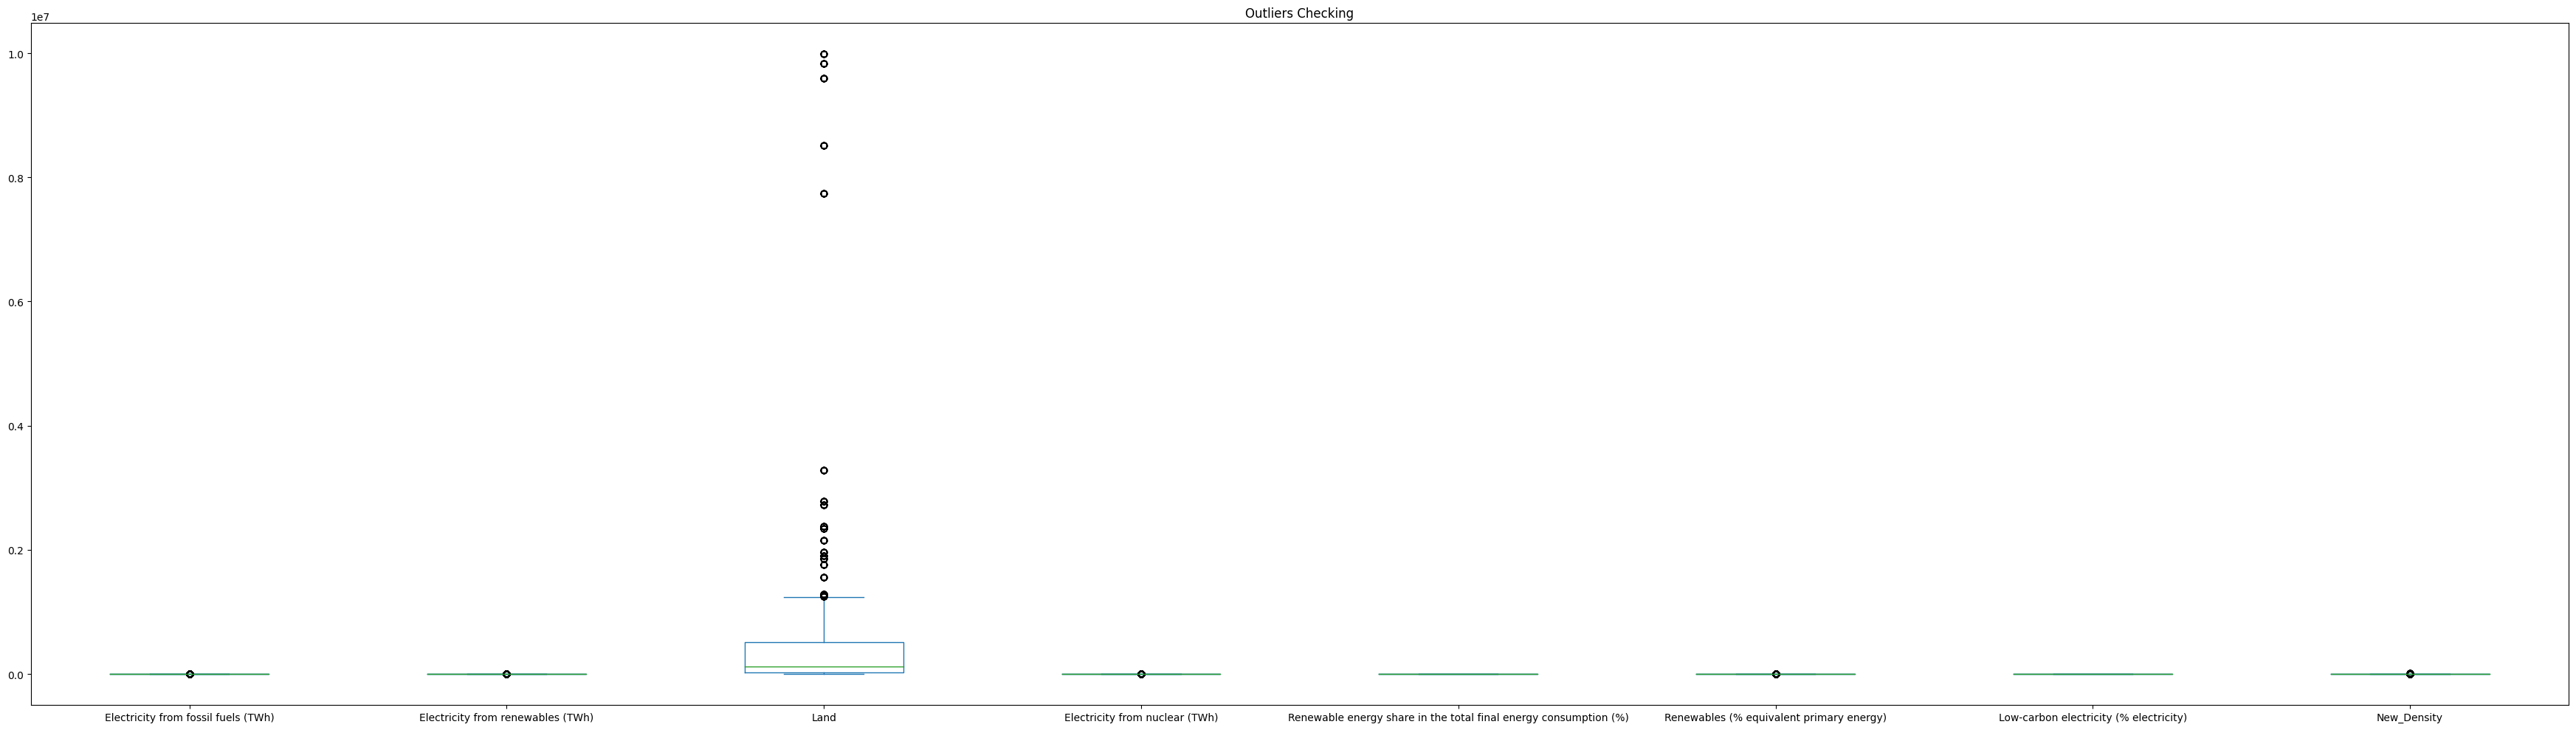

In [23]:
plt.rcParams["figure.figsize"] = [35, 10]
plt.rcParams["figure.autolayout"] = True
ax = df[['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Land', 'Electricity from nuclear (TWh)',
        'Renewable energy share in the total final energy consumption (%)', 'Renewables (% equivalent primary energy)',
        'Low-carbon electricity (% electricity)','New_Density']].plot(kind='box', title='Outliers Checking')
plt.show()

- Có thể thấy các cột có outliers là **Electricity from fossil fuels (TWh), Electricity from renewables (TWh), Land, Electricity from nuclear (TWh),  Renewables (% equivalent primary energy)** ==> Xử lý outliers

In [24]:
df['Electricity from nuclear (TWh)'].value_counts()

Electricity from nuclear (TWh)
0.00000      2945
13.45019      126
5.55000         3
3.91000         3
11.62000        3
             ... 
436.76000       1
421.08000       1
415.16000       1
23.29000        1
789.88000       1
Name: count, Length: 548, dtype: int64

- Do cột **Electricity from Nuclear** có dữ liệu đa số ghi nhận là 0, những dữ liệu > 0 chiếm rất ít và sẽ không ảnh hưởng quả nhiều nên không cần xử lý outliers

In [25]:
first_quantile,third_quantile = df['Electricity from fossil fuels (TWh)'].quantile([0.25, 0.75])

iqr = third_quantile - first_quantile

maximum = third_quantile + 1.5*iqr
minimum = first_quantile - 1.5*iqr

print("maximum:",maximum,"minimum:",minimum)
df.loc[df['Electricity from fossil fuels (TWh)']>maximum,'Electricity from fossil fuels (TWh)'] = maximum
df.loc[df['Electricity from fossil fuels (TWh)']<minimum,'Electricity from fossil fuels (TWh)'] = minimum

maximum: 68.4 minimum: -40.56


In [26]:
first_quantile,third_quantile = df['Electricity from renewables (TWh)'].quantile([0.25, 0.75])
iqr = third_quantile - first_quantile

maximum = third_quantile + 1.5*iqr
minimum = first_quantile - 1.5*iqr

print("maximum:",maximum,"minimum:",minimum)
df.loc[df['Electricity from renewables (TWh)']>maximum,'Electricity from renewables (TWh)'] = maximum
df.loc[df['Electricity from renewables (TWh)']<minimum,'Electricity from renewables (TWh)'] = minimum

maximum: 24.974999999999998 minimum: -14.904999999999998


In [27]:
first_quantile,third_quantile = df['Land'].quantile([0.25, 0.75])

iqr = third_quantile - first_quantile

maximum = third_quantile + 1.5*iqr
minimum = first_quantile - 1.5*iqr

print("maximum:",maximum,"minimum:",minimum)
df.loc[df['Land']>maximum,'Land'] = maximum
df.loc[df['Land']<minimum,'Land'] = minimum

maximum: 1244230.5 minimum: -705397.5


In [28]:
first_quantile,third_quantile = df['New_Density'].quantile([0.25, 0.75])

iqr = third_quantile - first_quantile

maximum = third_quantile + 1.5*iqr
minimum = first_quantile - 1.5*iqr

print("maximum:",maximum,"minimum:",minimum)
df.loc[df['New_Density']>maximum,'New_Density'] = maximum
df.loc[df['New_Density']<minimum,'New_Density'] = minimum

maximum: 496.5 minimum: -243.5


In [29]:
first_quantile,third_quantile = df['Renewables (% equivalent primary energy)'].quantile([0.25, 0.75])

iqr = third_quantile - first_quantile

maximum = third_quantile + 1.5*iqr
minimum = first_quantile - 1.5*iqr

print("maximum:",maximum,"minimum:",minimum)
df.loc[df['Renewables (% equivalent primary energy)']>maximum,'Renewables (% equivalent primary energy)'] = maximum
df.loc[df['Renewables (% equivalent primary energy)']<minimum,'Renewables (% equivalent primary energy)'] = minimum

maximum: 15.454342070238091 minimum: 6.207314757857147


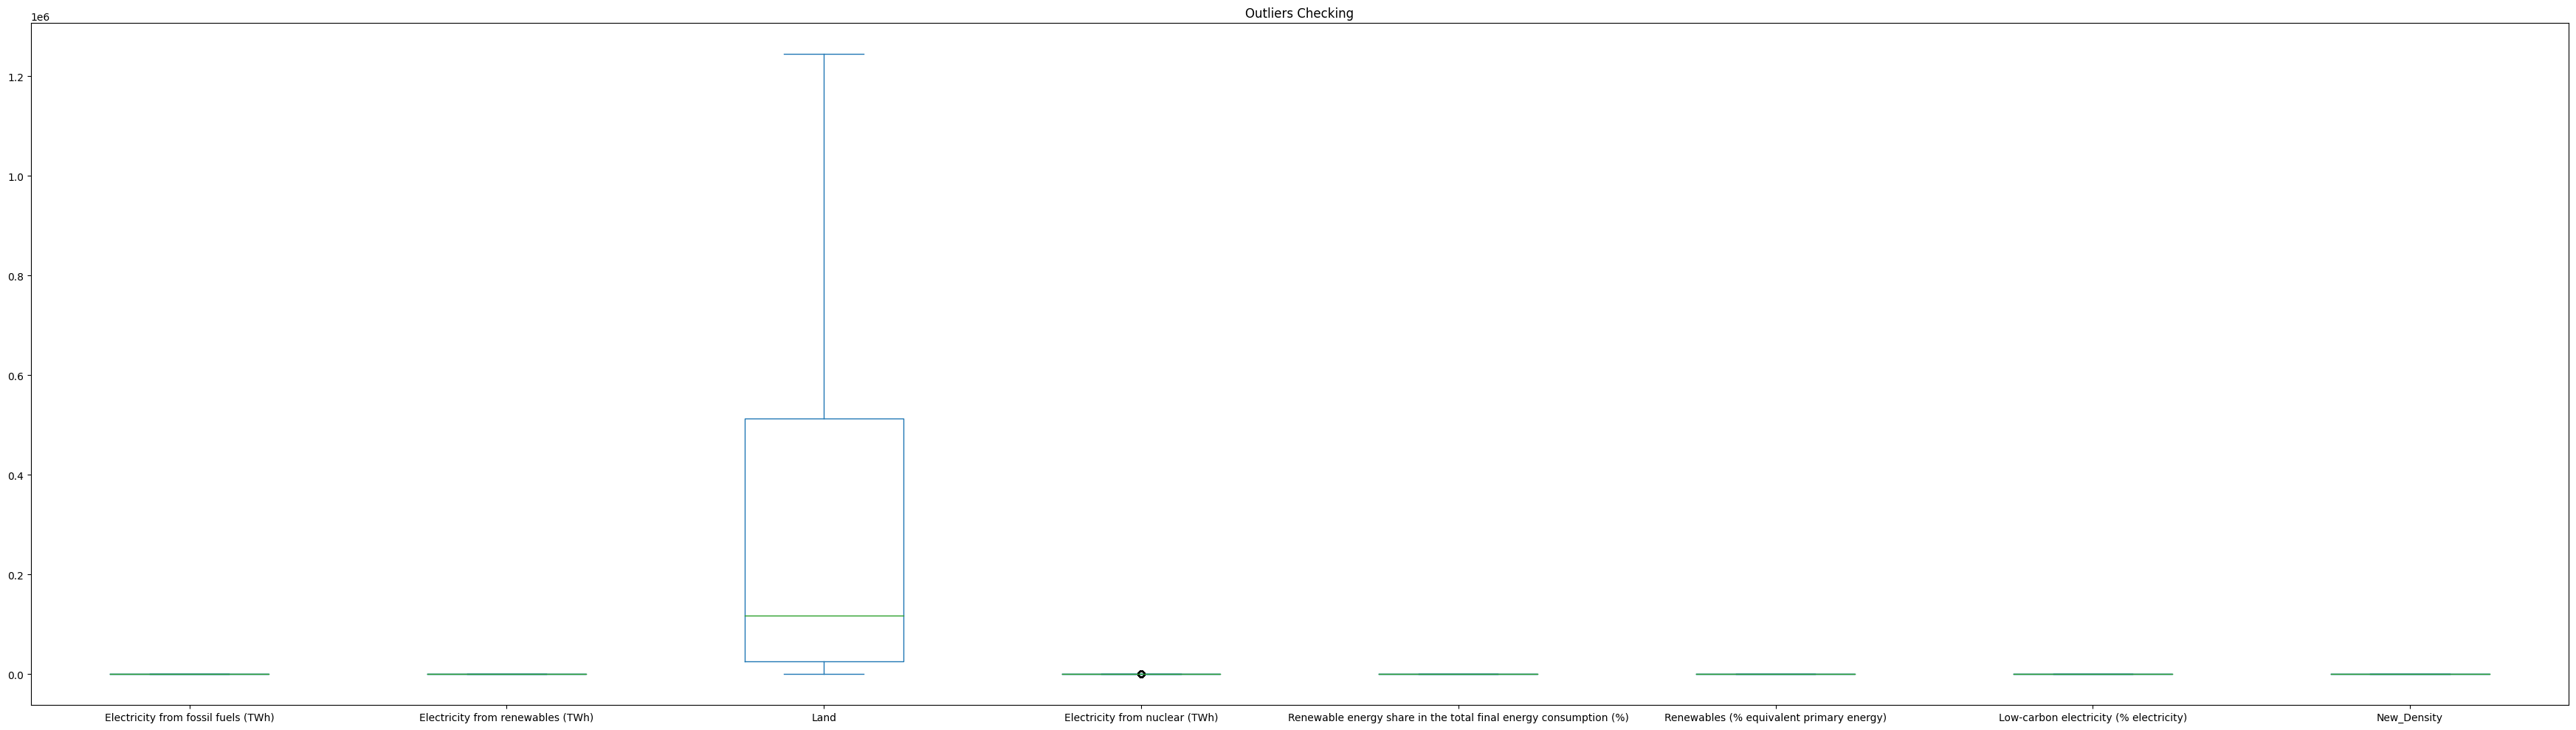

In [30]:
plt.rcParams["figure.figsize"] = [35, 10]
plt.rcParams["figure.autolayout"] = True
ax = df[['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)', 'Land', 'Electricity from nuclear (TWh)',
        'Renewable energy share in the total final energy consumption (%)', 'Renewables (% equivalent primary energy)',
        'Low-carbon electricity (% electricity)','New_Density']].plot(kind='box', title='Outliers Checking')
plt.show()

- Đã xử lý xong outliers

## Train test split

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns='CO2_emissions'),df.CO2_emissions,test_size=0.3,random_state=42)
X_train.shape, X_test.shape

((2554, 8), (1095, 8))

## Scale Data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
X_train_scale

array([[-8.93513483e-01,  4.52728522e-01, -1.93819736e-01, ...,
        -1.70251671e+00, -6.67901320e-01, -3.19829195e-01],
       [ 1.73963603e+00, -6.98265925e-01, -1.93819736e-01, ...,
         3.20064251e-01, -6.27357844e-01, -2.29144041e-01],
       [ 5.77139555e-01, -6.30607192e-01, -1.93819736e-01, ...,
         3.20064251e-01, -6.13843352e-01, -5.02896722e-01],
       ...,
       [-6.76307657e-03, -9.80931639e-02, -1.93819736e-01, ...,
         3.20064251e-01, -2.69223800e-01, -5.49143614e-01],
       [-9.32551255e-01,  2.00848139e+00,  1.10234425e+01, ...,
        -1.70251671e+00, -7.42231027e-01,  2.13742035e+00],
       [-2.29525901e-01, -6.85928156e-01, -1.93819736e-01, ...,
         3.20064251e-01, -9.58462903e-01, -4.23606177e-01]])

# Modeling

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extreme Gradient Boosting': XGBRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train_scale, y_train)
    y_pred= model.predict(X_test_scale)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual Electricity'] = y_test
    submit['Predict_Electricity'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))
    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.46
Mean Absolute Error (MAE): 166525.68
Root Mean Squared Error (RMSE): 491067.87
   index  Actual Electricity  Predict_Electricity
0   1406         3950.000048       -102491.119072
1   3598       159866.462686        124550.418935
2   3646        12380.000110          4881.129249
3   3230         2150.000000        -70632.939720
4   3114       274399.993900        535049.566607
----------------------------------------
SVR:
R2 Score: -0.04
Mean Absolute Error (MAE): 140834.57
Root Mean Squared Error (RMSE): 682839.98
   index  Actual Electricity  Predict_Electricity
0   1406         3950.000048         18276.987549
1   3598       159866.462686         18608.039756
2   3646        12380.000110         18309.439884
3   3230         2150.000000         18433.539797
4   3114       274399.993900         18840.766054
----------------------------------------
Decision Tree:
R2 Score: 0.61
Mean Absolute Error (MAE): 35878.51
Root Mean Squared Error (RMSE): 419666.

- Có thể thấy model **RandomForest** cho ra điểm r2_score là cao nhất

# Fine Tuning

In [34]:
X = df.drop(columns='CO2_emissions')
y = df.CO2_emissions

In [35]:
import optuna
from sklearn.metrics import r2_score
def objective(trial):
    scaler = StandardScaler()
    # Define the hyperparameters to search over
    n_estimators = trial.suggest_int('n_estimators', 1, 500)
    max_depth = trial.suggest_int('max_depth', 1,50)
    min_samples_split = trial.suggest_int('min_samples_split', 2,10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1,20)
    random_state = trial.suggest_int('random_state',0,100)

    # Create the Gradient Boosting model with the suggested hyperparameters
    model = RandomForestRegressor (
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split= min_samples_split,
        min_samples_leaf = min_samples_leaf,
        random_state=random_state,
    )
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler.fit_transform(X_train)
    X_train = scaler.transform(X_train)
    X_valid = scaler.transform(X_valid)
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_valid)

    # Calculate the accuracy as the score to optimize
    score = r2_score(y_valid, y_pred)

    return score

In [36]:
study = optuna.create_study(direction='maximize')
n_trials = 200  # You can adjust this number based on your computational resources
study.optimize(objective, n_trials=n_trials)

[I 2023-11-11 20:58:20,898] A new study created in memory with name: no-name-7421b212-3436-4cab-a065-e4eab52d7daa
[I 2023-11-11 20:58:24,945] Trial 0 finished with value: 0.7874338005064605 and parameters: {'n_estimators': 280, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 8, 'random_state': 3}. Best is trial 0 with value: 0.7874338005064605.
[I 2023-11-11 20:58:26,031] Trial 1 finished with value: 0.7186694480205822 and parameters: {'n_estimators': 38, 'max_depth': 41, 'min_samples_split': 2, 'min_samples_leaf': 10, 'random_state': 66}. Best is trial 0 with value: 0.7874338005064605.
[I 2023-11-11 20:58:27,040] Trial 2 finished with value: 0.6992247967101406 and parameters: {'n_estimators': 124, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 5, 'random_state': 42}. Best is trial 0 with value: 0.7874338005064605.
[I 2023-11-11 20:58:27,912] Trial 3 finished with value: 0.7037703216767136 and parameters: {'n_estimators': 31, 'max_depth': 25, 'min_samples_split

In [37]:
best_params = study.best_params
best_score = study.best_value
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train_scale, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=39, random_state=82)

In [38]:
model = RandomForestRegressor(**best_params)

model.fit(X_train_scale, y_train)
y_pred= model.predict(X_test_scale)

    # Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
submit = pd.DataFrame()
submit['Actual Electricity'] = y_test
submit['Predict_Electricity'] = y_pred
submit = submit.reset_index()
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(submit.head(5))

R2 Score: 0.85
Mean Absolute Error (MAE): 42507.55
Root Mean Squared Error (RMSE): 261376.04
   index  Actual Electricity  Predict_Electricity
0   1406         3950.000048          3989.515141
1   3598       159866.462686         36343.699276
2   3646        12380.000110         13709.289978
3   3230         2150.000000          4356.856896
4   3114       274399.993900        282843.260856


- Sau khi Fine Tuning với Optuna, điểm r2 của Model
RandomForestRegressor đã tăng lên

In [39]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [30, 50, 70],
    'min_samples_split': [8, 9, 10],
    'min_samples_leaf': [6, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scale, y_train)
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train_scale, y_train)
y_pred = best_model.predict(X_test_scale)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
308 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

In [40]:
print(r2_score(y_test,y_pred))

0.812811791552615


# Deep Learning

In [42]:
import tensorflow as tf
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None): 
        if logs is not None and logs.get('mean_absolute_error') < 30000:
            print("\nReached mean absolute error < 21963.30, so cancelling training!")
            self.model.stop_training = True

callback = MyCallback()
import tensorflow.keras as keras
base_model = keras.Sequential([
                            keras.layers.Dense(30,activation ='linear', input_shape = X_train_scale.shape[1:]),
                            keras.layers.Dense(10,activation ='relu'),
                            keras.layers.Dense(1, activation='relu')
                            ])
base_model.compile(optimizer='adam',loss='mean_absolute_percentage_error',metrics=['mean_absolute_error'])
base_model.fit(X_train_scale,y_train,callbacks=[callback],epochs = 10000)

Epoch 1/10000
80/80 [==============================] - 1s 2ms/step - loss: 99.8323 - mean_absolute_error: 166180.7812
Epoch 2/10000
80/80 [==============================] - 0s 2ms/step - loss: 99.0674 - mean_absolute_error: 166176.0781
Epoch 3/10000
80/80 [==============================] - 0s 2ms/step - loss: 96.9772 - mean_absolute_error: 166162.8906
Epoch 4/10000
80/80 [==============================] - 0s 1ms/step - loss: 94.9792 - mean_absolute_error: 166143.9688
Epoch 5/10000
80/80 [==============================] - 0s 2ms/step - loss: 94.0779 - mean_absolute_error: 166127.2188
Epoch 6/10000
80/80 [==============================] - 0s 2ms/step - loss: 93.4352 - mean_absolute_error: 166112.4062
Epoch 7/10000
80/80 [==============================] - 0s 2ms/step - loss: 93.0082 - mean_absolute_error: 166104.2188
Epoch 8/10000
80/80 [==============================] - 0s 2ms/step - loss: 92.8023 - mean_absolute_error: 166095.7344
Epoch 9/10000
80/80 [==============================] - 0

In [ ]:
base_model.evaluate(X_test_scale,y_test)

35/35 [==============================] - 0s 699us/step - loss: 72867.2109 - mean_absolute_error: 72867.2109


[72867.2109375, 72867.2109375]

# Draw Map

In [ ]:
null_rows = d_map[d_map.isna().any(axis=1)]
null_rows

Entity  Latitude  Longitude
1218  French Guiana       NaN        NaN

In [ ]:
d_map['Latitude'].fillna(4.937200,inplace=True)
d_map['Longitude'].fillna(-52.326000,inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4928\3354377457.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4928\3354377457.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
!pip install folium


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import folium as fo
from folium.plugins import MarkerCluster

world_map = fo.Map(location = [0, 0], zoom_start = 2, control_scale = True) #open street map, cartodb positron, stamen toner
marker_cluster = MarkerCluster(name = "Clustered Icons",
                            overlay = True,
                            control = True,
                            icon_create_function = None).add_to(world_map)
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(0, df.shape[0]):
  country = d_map.Entity[i]
  #name_state = df.state_name[i]
  fil_country = d_map.loc[d_map['Entity'] == country]
  lati = fil_country['Latitude'].values[0]
  longi = fil_country['Longitude'].values[0]
  fo.Marker(location = [lati, longi],
            popup = country,
            icon = fo.Icon(icon = 'cloud', icon_color = 'white')).add_to(marker_cluster) # fo.Icon(icon='cloud', icon_color='white'), cloud, heart, flag
world_map